In [1]:
import georasters as gr

import pandas as pd
import geopandas as gpd

from osgeo import osr, gdal

import numpy as np
import rasterio
import matplotlib.pyplot as plt

<AxesSubplot:>

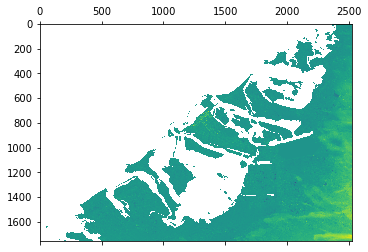

In [2]:
elevation_t = gr.from_file('Data/Elevation.tif')
elevation_t.plot()

In [3]:
elevation_df = elevation_t.to_pandas()
elevation_df.head()

,row,col,value,x,y
0,0,2347,1.0,54.651806,24.700139
1,0,2348,0.0,54.652084,24.700139
2,0,2349,1.0,54.652361,24.700139
3,0,2350,1.0,54.652639,24.700139
4,0,2351,2.0,54.652917,24.700139


In [4]:
vlm_d = pd.read_excel('Data/data_analisis.xls')
vlm_d.head()

,Station,Longitude,Latitude,VLM,VLM_std
0,NYWV,54.684594,24.796595,-0.207,0.223
1,NYWT,54.115618,24.303783,1.413,0.158
2,NYSM,53.848164,24.056855,-0.856,0.154
3,NYRH,53.141386,24.147625,-0.724,0.166
4,NYRB,52.587928,24.171598,1.812,0.274


In [5]:
slr_d = pd.read_excel('Data/SLR-A.xls', skiprows=15)

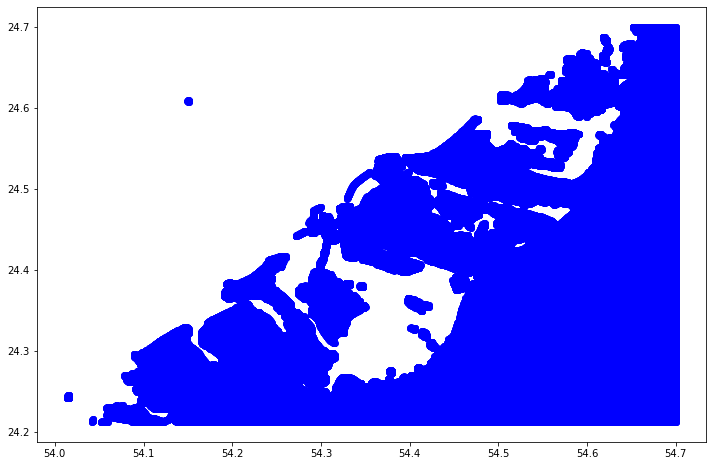

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(elevation_df.x, elevation_df.y, color='b')
plt.show()

# Interpolate Attempt-1

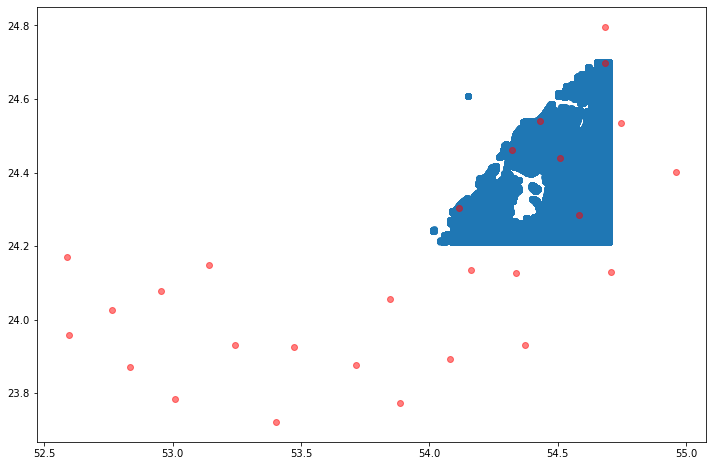

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(elevation_df.x, elevation_df.y, alpha=0.5)
plt.scatter(vlm_d.Longitude, vlm_d.Latitude, color='r', alpha=0.5)

# Interpolate Attempt-2

In [8]:
from scipy.interpolate import griddata

In [9]:
min1, max1 = min(vlm_d.Longitude), max(vlm_d.Longitude)
min2, max2 = min(vlm_d.Latitude), max(vlm_d.Latitude)

In [10]:
# grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
grid_x, grid_y = np.mgrid[min1:max1:1000j, min2:max2:1000j]

In [11]:
vlm_points = vlm_d[['Longitude', 'Latitude']].values
vlm_values = vlm_d.VLM.values

In [12]:
v_grid = griddata(vlm_points, vlm_values, (grid_x, grid_y), method = 'nearest')

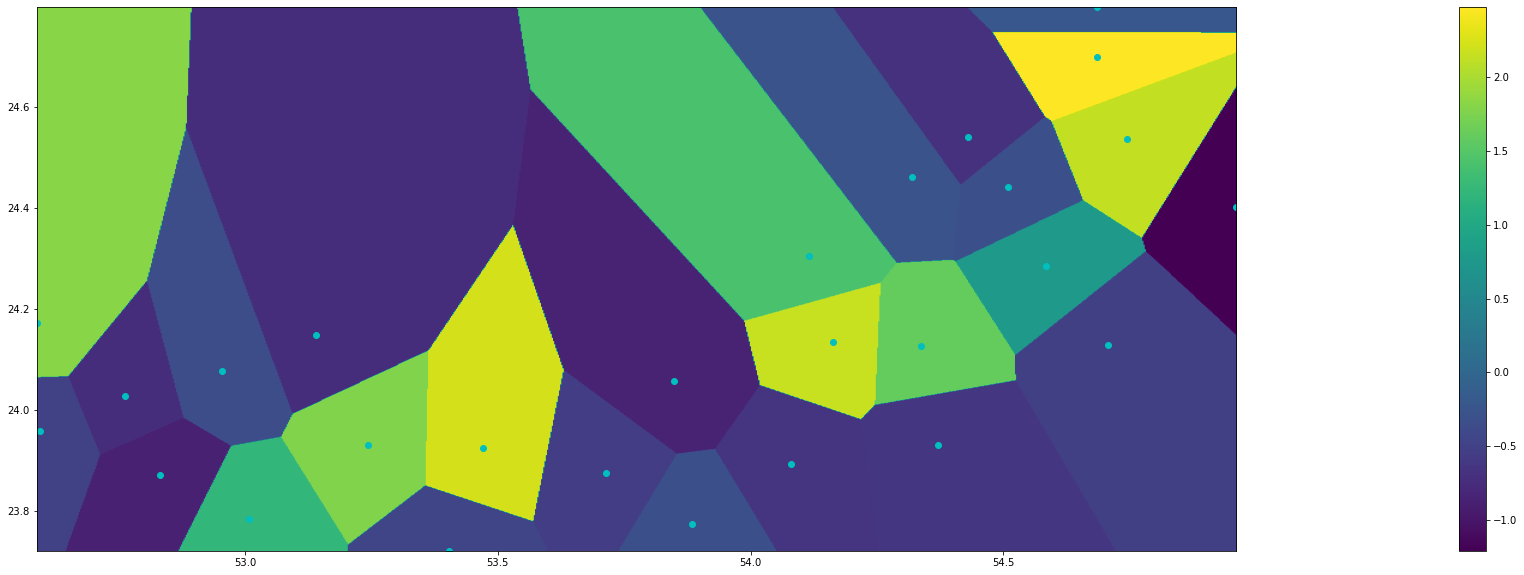

In [13]:
plt.figure(figsize = (80,10))

plt.imshow(v_grid.T, extent=(min(vlm_d.Longitude), max(vlm_d.Longitude), min(vlm_d.Latitude), max(vlm_d.Latitude)), origin='lower') 
plt.plot(vlm_d.Longitude, vlm_d.Latitude,"ok", color='c')

plt.colorbar()
plt.show()

# Interpolate Attempt-3

In [14]:
elev_coor = elevation_df[['x', 'y']].values

In [15]:
grid_2 = griddata(vlm_points, vlm_values, elev_coor, method='nearest')

In [16]:
# plt.figure(figsize=(12, 8))
# plt.scatter(elevation_df.x, elevation_df.y, c=grid_2)
# plt.show()

# Interpolate Attempt-4

In [17]:
import fiona
import pandas as pd
from collections import OrderedDict

In [18]:
totalColi = pd.read_excel('Data/data_analisis.xls', index_col=0)
totalColi.head()

,Longitude,Latitude,VLM,VLM_std
Station,,,,
NYWV,54.684594,24.796595,-0.207,0.223
NYWT,54.115618,24.303783,1.413,0.158
NYSM,53.848164,24.056855,-0.856,0.154
NYRH,53.141386,24.147625,-0.724,0.166
NYRB,52.587928,24.171598,1.812,0.274


In [19]:
totalColi.dtypes

Longitude    float64
Latitude     float64
VLM          float64
VLM_std      float64
dtype: object

In [20]:
schema = {'properties': OrderedDict([('obsName', 'str')]), 'geometry': 'Point'}
crs = {'init': 'epsg:4326'}

In [21]:
coliShp = fiona.open('Data/totalColiforms.shp',mode='w',schema=schema,driver='ESRI Shapefile',crs=crs)

for index, line in totalColi.iterrows():
    feature = {
    'geometry':{'type':'Point','coordinates':(line.Longitude,line.Latitude)},
    'properties':OrderedDict([('obsName',index)])
    }
    coliShp.write(feature)
coliShp.close()

epsg:4326


<AxesSubplot:>

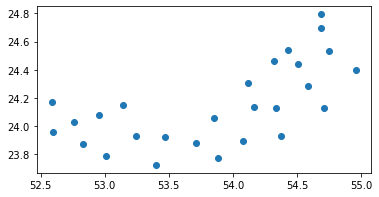

In [31]:
#open point shapefile
vlm_point = gpd.read_file('Data/totalColiforms.shp')
print(vlm_point.crs)
vlm_point.plot()

In [28]:
from rasterio.plot import show

elevation_raster = rasterio.open('Data/Elevation.tif')
print(elevation_raster.crs)
print(elevation_raster.count)

EPSG:4326
1


<AxesSubplot:>

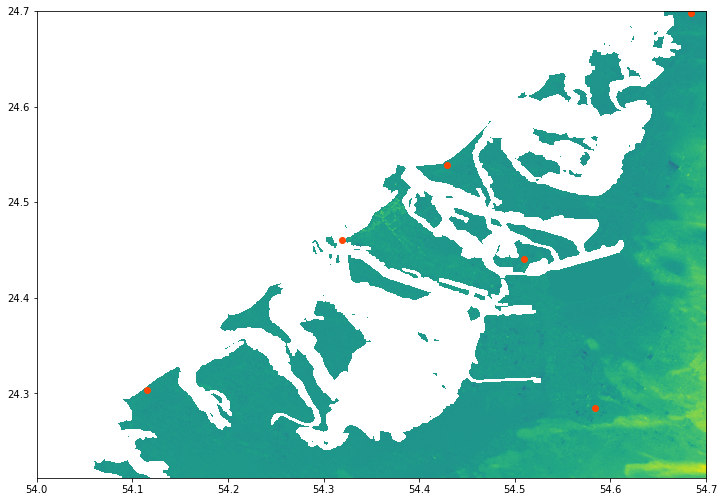

In [29]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
vlm_point.plot(ax=ax, color='orangered')
show(elevation_raster, ax=ax)

# Scenarios

In [23]:
slr_d = slr_d.drop(columns=['PSMSL ID','Site','Background RSL rate (mm/yr)','RSL in 2000 (cm)','RSL in 2010 (cm)','RSL in 2020 (cm)', 'RSL in 2040 (cm)', 'RSL in 2060 (cm)', 'RSL in 2070 (cm)', 'RSL in 2090 (cm)', 'RSL in 2120 (cm)', 'RSL in 2150 (cm)', 'RSL in 2200 (cm)'])
slr_d.head()

,Latitude,Longitude,Scenario,RSL in 2030 (cm),RSL in 2050 (cm),RSL in 2080 (cm),RSL in 2100 (cm)
0,54.080777,23.8926,0.3 - MED,15,25,39,46
1,54.080777,23.8926,0.3 - LOW,10,15,21,22
2,54.080777,23.8926,0.3 - HIGH,21,36,54,65
3,54.080777,23.8926,0.5 - MED,19,31,50,61
4,54.080777,23.8926,0.5 - LOW,13,24,39,47


In [24]:
d = slr_d.iloc[1]
scenarios_df = pd.DataFrame()
scenarios_df = scenarios_df.append(d, ignore_index=True)
d = slr_d.iloc[17]
scenarios_df = scenarios_df.append(d, ignore_index=True)
scenarios_df

,Latitude,Longitude,RSL in 2030 (cm),RSL in 2050 (cm),RSL in 2080 (cm),RSL in 2100 (cm),Scenario
0,54.080777,23.8926,10.0,15.0,21.0,22.0,0.3 - LOW
1,54.080777,23.8926,55.0,114.0,241.0,357.0,2.5 - HIGH
